In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import struct
%matplotlib widget

import torch

from torch import nn
import torch.nn.functional as F

from torch import optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
class MnistDataset(Dataset):
    def __init__(self, path):
        super().__init__()
        
        self.digits = self.load_digits(f"{path}-images.idx3-ubyte")
        self.ditig_labels = self.load_digit_labels(f"{path}-labels.idx1-ubyte")
        
        self.data = self.load_images()
        #list(zip(self.digits, self.ditig_labels))
    
    def load_digits(self, path):
        with open(path, "rb") as fp:
            struct.unpack(">I", fp.read(4))
            number_of_images = struct.unpack(">I", fp.read(4))[0]
            rows = struct.unpack(">I", fp.read(4))[0]
            cols = struct.unpack(">I", fp.read(4))[0]
            digits = np.frombuffer(fp.read(number_of_images*rows*cols), dtype=np.uint8).reshape((number_of_images, 1, rows, cols))
            digits = digits.astype(np.float32)/255
            return digits
    
    def load_digit_labels(self, path):
        with open(path, "rb") as fp:
            struct.unpack(">I", fp.read(4))
            number_of_labels = struct.unpack(">I", fp.read(4))[0]
            ditig_labels = np.frombuffer(fp.read(number_of_labels), dtype=np.uint8)
            return ditig_labels
        
    def load_images(self):
        slike = []
        labele = []
        for _ in range(10000):
            velika_slika = np.zeros((1, 80, 80), dtype=np.float32)
            labela = -1*np.ones((1, 80, 80), dtype=np.float32)
            cifre = np.random.choice(len(self.digits), 2)
            koordinate = np.random.randint(0, 80-28, size=(2, 2))

            for i, c in enumerate(cifre):
                velika_slika[0][koordinate[i][0]:koordinate[i][0]+28, koordinate[i][1]:koordinate[i][1]+28] = self.digits[c]
                labela[0][koordinate[i][0]:koordinate[i][0]+28, koordinate[i][1]:koordinate[i][1]+28] = 1
            
            slike.append(velika_slika)
            labele.append(labela)
        return list(zip(slike, labele))
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return len(self.data)

In [3]:
mnist_train = MnistDataset("train")
mnist_train_ds = DataLoader(mnist_train, batch_size=32, shuffle=True)

mnist_test = MnistDataset("t10k")
mnist_test_ds = DataLoader(mnist_test, batch_size=5, shuffle=True)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 50, 3, padding=1)
        self.conv2 = nn.Conv2d(50, 30, 3, padding=1)
        self.conv3 = nn.Conv2d(30, 15, 3, padding=1)
        self.conv4 = nn.Conv2d(15, 10, 3, padding=1)
        self.conv5 = nn.Conv2d(10, 1, 3, padding=1)
        
    def forward(self, x):
        conv1_out = F.relu(self.conv1(x))
        conv2_out = F.relu(self.conv2(conv1_out))
        conv3_out = F.relu(self.conv3(conv2_out))
        conv4_out = F.relu(self.conv4(conv3_out))
        conv5_out = F.tanh(self.conv5(conv4_out))
        return conv5_out

In [5]:
net = Net()

In [9]:
criterion = nn.MSELoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.85)

total_data = len(mnist_train_ds)
total_epochs = 10

for epoch in range(total_epochs):
    for i, data in enumerate(mnist_train_ds):
        x, y = data[0], data[1]
        optimizer.zero_grad()
        yp = net(x)
        loss = criterion(yp, y)
        loss.backward()
        optimizer.step()
    print(epoch)
    

0
1
2
3
4
5
6
7
8
9


In [8]:
with torch.no_grad():
    
    data = iter(mnist_test_ds).next()
    x, y = data[0], data[1]
    
    y_p = net(x)
    
    plt.figure()    
    plt.imshow(x[0][0])
    plt.show()
    
    plt.figure()    
    plt.imshow(y[0][0])
    plt.show()
    
    plt.figure()    
    plt.imshow(y_p[0][0])
    plt.show()
    
    # tacnih = 0
    # for i, data in enumerate(mnist_test_ds):
    #     x, y = data[0], data[1]
    #     yp = torch.argmax(net(x), 1)
    #     tacnih += (y == yp).sum().item()
    # print(f"Tacnost: {100*(tacnih/len(mnist_test))}%")

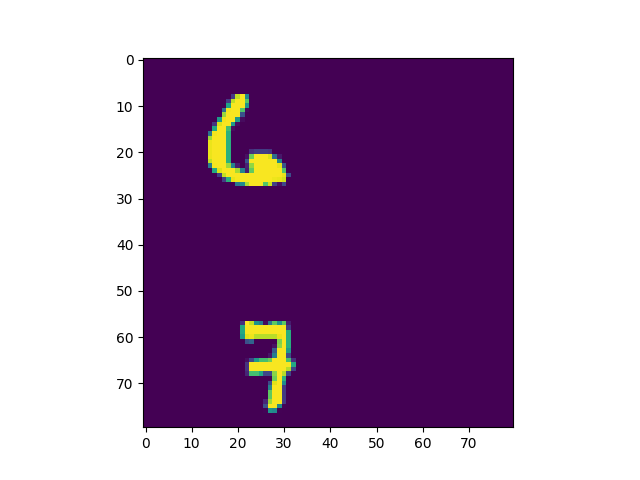

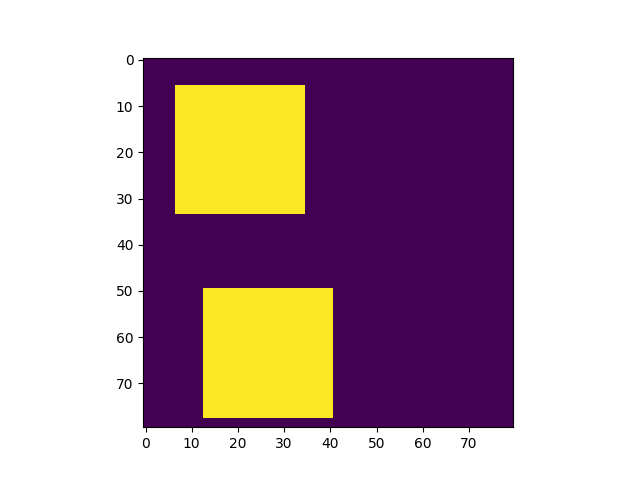

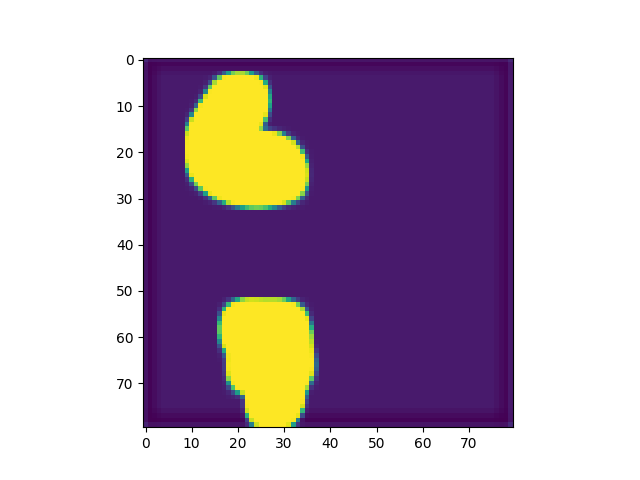

In [10]:
with torch.no_grad():
    
    data = iter(mnist_test_ds).next()
    x, y = data[0], data[1]
    
    y_p = net(x)
    
    plt.figure()    
    plt.imshow(x[0][0])
    plt.show()
    
    plt.figure()    
    plt.imshow(y[0][0])
    plt.show()
    
    plt.figure()    
    plt.imshow(y_p[0][0])
    plt.show()

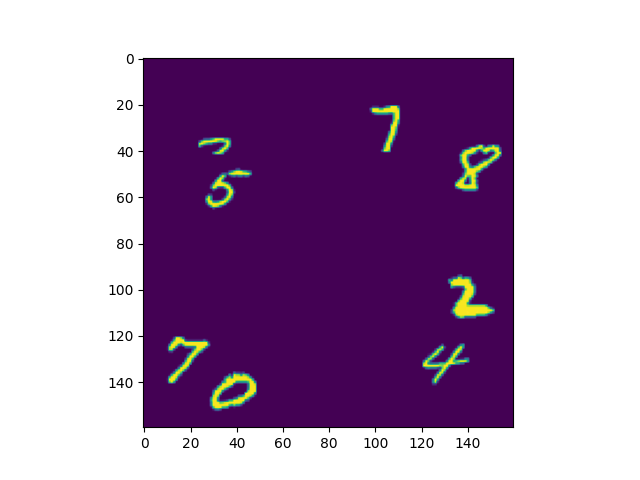

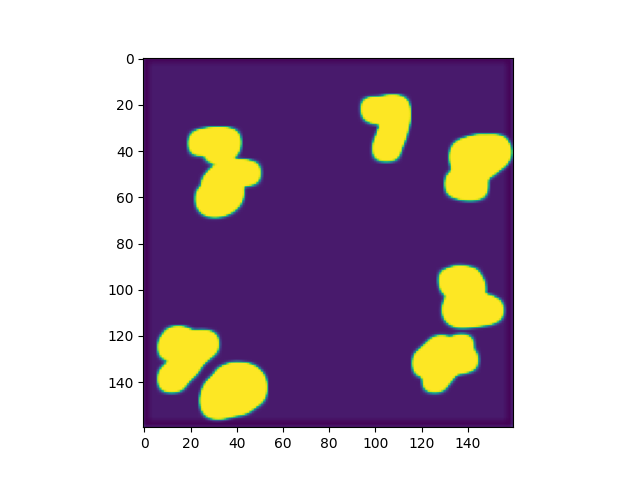

In [33]:
with torch.no_grad():
    nova_slika = np.zeros((1, 160, 160), dtype=np.float32)
    data = iter(mnist_test_ds).next()
    nova_slika[0][0:80, 0:80] = data[0][0][0]
    nova_slika[0][80:160, 0:80] = data[0][1][0]

    nova_slika[0][80:160, 80:160] = data[0][2][0]
    nova_slika[0][0:80, 80:160] = data[0][3][0]

    plt.figure()
    plt.imshow(nova_slika[0])
    plt.show()

    r = net(torch.from_numpy(nova_slika))

    plt.figure()
    plt.imshow(r[0])
    plt.show()